# MGAB

In [42]:
from typing import List
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets, DatasetRecord
from timeeval.datasets import DatasetAnalyzer

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

In [35]:
dataset_collection_name = "MGAB"
source_folder = Path(data_raw_folder) / "MGAB" / "data"
target_folder = data_processed_folder

print(f"Looking for source datasets in {Path(source_folder).absolute()} and\nsaving processed datasets in {Path(target_folder).absolute()}")

Looking for source datasets in /home/sebastian/Documents/projects/timeeval/notebooks/data-prep/../../datasets/MGAB/data and
saving processed datasets in /home/sebastian/Documents/projects/timeeval/notebooks/data-prep/../../datasets/data-processed


In [36]:
# shared by all datasets
dataset_type = "synthetic"
input_type = "univariate"
datetime_index = True
split_at = None
train_is_normal = False
train_type = "unsupervised"

# create target directory
dataset_subfolder = Path(input_type) / dataset_collection_name
target_subfolder = target_folder / dataset_subfolder
target_subfolder.mkdir(parents=True, exist_ok=True)
print(f"Created directories {target_subfolder}")

dm = Datasets(target_folder)

Created directories ../../datasets/data-processed/univariate/MGAB


In [43]:
anomaly_window_margins = 10

def list_regular_files(path: Path) -> List[Path]:
    return [f for f in path.iterdir() if f.is_file()]

def process_dataset(dm: Datasets, f: Path) -> None:
    dataset_name = f.stem
    test_filename = f"{dataset_name}.test.csv"
    test_path = dataset_subfolder / test_filename
    target_test_filepath = target_subfolder / test_filename
    target_meta_filepath = target_test_filepath.parent / f"{dataset_name}.{Datasets.METADATA_FILENAME_PREFIX}"

    # Prepare datasets
    df = pd.read_csv(f, index_col=0)
    del df["is_ignored"]
    df.insert(0, "timestamp", pd.to_datetime(df.index, unit="s"))

    anomaly_points = df[df["is_anomaly"] - df["is_anomaly"].shift() == 1].index + 200
    df["is_anomaly"] = 0
    for x in anomaly_points:
        idx = list(range(x-anomaly_window_margins, x+anomaly_window_margins))
        df.loc[idx, "is_anomaly"] = 1
    df.to_csv(target_test_filepath, index=False)

    # Prepare metadata
    da = DatasetAnalyzer((dataset_collection_name, dataset_name), is_train=False, df=df)
    da.save_to_json(target_meta_filepath, overwrite=True)
    meta = da.metadata

    dm.add_dataset(DatasetRecord(
          collection_name=dataset_collection_name,
          dataset_name=dataset_name,
          train_path="",
          test_path=test_path,
          dataset_type=dataset_type,
          datetime_index=datetime_index,
          split_at=split_at,
          train_type=train_type,
          train_is_normal=train_is_normal,
          input_type=input_type,
          length=meta.length,
          dimensions=meta.dimensions,
          contamination=meta.contamination,
          num_anomalies=meta.num_anomalies,
          min_anomaly_length=meta.anomaly_length.min,
          median_anomaly_length=meta.anomaly_length.median,
          max_anomaly_length=meta.anomaly_length.max,
          mean=meta.mean,
          stddev=meta.stddev,
          trend=meta.trend,
          stationarity=meta.get_stationarity_name(),
    ))
    print(f"Processed source dataset {f} -> {target_test_filepath}")

for file in list_regular_files(source_folder):
    process_dataset(dm, file)
dm.save()

Processed source dataset ../../datasets/MGAB/data/7.csv -> ../../datasets/data-processed/univariate/MGAB/7.test.csv
Processed source dataset ../../datasets/MGAB/data/3.csv -> ../../datasets/data-processed/univariate/MGAB/3.test.csv
Processed source dataset ../../datasets/MGAB/data/2.csv -> ../../datasets/data-processed/univariate/MGAB/2.test.csv
Processed source dataset ../../datasets/MGAB/data/6.csv -> ../../datasets/data-processed/univariate/MGAB/6.test.csv
Processed source dataset ../../datasets/MGAB/data/1.csv -> ../../datasets/data-processed/univariate/MGAB/1.test.csv
Processed source dataset ../../datasets/MGAB/data/8.csv -> ../../datasets/data-processed/univariate/MGAB/8.test.csv
Processed source dataset ../../datasets/MGAB/data/9.csv -> ../../datasets/data-processed/univariate/MGAB/9.test.csv
Processed source dataset ../../datasets/MGAB/data/5.csv -> ../../datasets/data-processed/univariate/MGAB/5.test.csv
Processed source dataset ../../datasets/MGAB/data/4.csv -> ../../dataset

train_path  \
collection_name dataset_name                                                
Keogh           e0509m                  univariate/Keogh/e0509m.train.csv   
                e0509m_rand_50  univariate/Keogh/e0509m_rand_50.train.csv   
                qtdbSel100MLII  univariate/Keogh/qtdbSel100MLII.train.csv   
MGAB            1                                                           
                10                                                          
                2                                                           
                3                                                           
                4                                                           
                5                                                           
                6                                                           
                7                                                           
                8                                                           
                9                                                           

                                                               test_path  \
collection_name dataset_name                                               
Keogh           e0509m                  univariate/Keogh/e0509m.test.csv   
                e0509m_rand_50  univariate/Keogh/e0509m_rand_50.test.csv   
                qtdbSel100MLII  univariate/Keogh/qtdbSel100MLII.test.csv   
MGAB            1                             univariate/MGAB/1.test.csv   
                10                           univariate/MGAB/10.test.csv   
                2                             univariate/MGAB/2.test.csv   
                3                             univariate/MGAB/3.test.csv   
                4                             univariate/MGAB/4.test.csv   
                5                             univariate/MGAB/5.test.csv   
                6                             univariate/MGAB/6.test.csv   
                7                             univariate/MGAB/7.test.csv   
                8                             univariate/MGAB/8.test.csv   
                9                             univariate/MGAB/9.test.csv   

                               dataset_type  datetime_index split_at  \
collection_name dataset_name                                           
Keogh           e0509m                 real           False      NaN   
                e0509m_rand_50         real           False      NaN   
                qtdbSel100MLII         real           False      NaN   
MGAB            1                 synthetic            True     None   
                10                synthetic            True     None   
                2                 synthetic            True     None   
                3                 synthetic            True     None   
                4                 synthetic            True     None   
                5                 synthetic            True     None   
                6                 synthetic            True     None   
                7                 synthetic            True     None   
                8                 synthetic            True     None   
                9                 synthetic            True     None   

                                     train_type  train_is_normal  input_type  \
collection_name dataset_name                                                   
Keogh           e0509m          semi-supervised             True  univariate   
                e0509m_rand_50  semi-supervised             True  univariate   
                qtdbSel100MLII  semi-supervised             True  univariate   
MGAB            1                  unsupervised            False  univariate   
                10                 unsupervised            False  univariate   
                2                  unsupervised            False  univariate   
                3                  unsupervis

In [44]:
dm.refresh()
dm.df().loc[(slice(dataset_collection_name,dataset_collection_name), slice(None))]

train_path                    test_path  \
collection_name dataset_name                                           
MGAB            1                   NaN   univariate/MGAB/1.test.csv   
                10                  NaN  univariate/MGAB/10.test.csv   
                2                   NaN   univariate/MGAB/2.test.csv   
                3                   NaN   univariate/MGAB/3.test.csv   
                4                   NaN   univariate/MGAB/4.test.csv   
                5                   NaN   univariate/MGAB/5.test.csv   
                6                   NaN   univariate/MGAB/6.test.csv   
                7                   NaN   univariate/MGAB/7.test.csv   
                8                   NaN   univariate/MGAB/8.test.csv   
                9                   NaN   univariate/MGAB/9.test.csv   

                             dataset_type  datetime_index  split_at  \
collection_name dataset_name                                          
MGAB            1               synthetic            True       NaN   
                10              synthetic            True       NaN   
                2               synthetic            True       NaN   
                3               synthetic            True       NaN   
                4               synthetic            True       NaN   
                5               synthetic            True       NaN   
                6               synthetic            True       NaN   
                7               synthetic            True       NaN   
                8               synthetic            True       NaN   
                9               synthetic            True       NaN   

                                train_type  train_is_normal  input_type  \
collection_name dataset_name                                              
MGAB            1             unsupervised            False  univariate   
                10            unsupervised            False  univariate   
                2             unsupervised            False  univariate   
                3             unsupervised            False  univariate   
                4             unsupervised            False  univariate   
                5             unsupervised            False  univariate   
                6             unsupervised            False  univariate   
                7             unsupervised            False  univariate   
                8             unsupervised            False  univariate   
                9             unsupervised            False  univariate   

                              length  dimensions  contamination  \
collection_name dataset_name                                      
MGAB            1             100000           1          0.002   
                10            100000           1          0.002   
                2             100000           1          0.002   
                3             100000           1          0.002   
                4             100000           1          0.002   
                5             100000           1          0.002   
                6             100000           1          0.002   
                7             100000           1          0.002   
                8             100000           1          0.002   
                9             100000           1          0.002   

                              num_anomalies  min_anomaly_length  \
collection_name dataset_name                                      
MGAB            1                        10                  20   
                10                       10                  20   
                2                        10                  20   
                3                        10                  20   
                4                        10                  20   
                5                        10                  20   
                6                        10                  20   
  

## Exploration

In [37]:
df = pd.read_csv(source_folder / "1.csv", index_col=0)
del df["is_ignored"]
df.insert(0, "timestamp", pd.to_datetime(df.index, unit="s"))
df

,timestamp,value,is_anomaly
0,1970-01-01 00:00:00,0.902918,0
1,1970-01-01 00:00:01,0.971865,0
2,1970-01-01 00:00:02,1.047105,0
3,1970-01-01 00:00:03,1.108403,0
4,1970-01-01 00:00:04,1.150962,0
...,...,...,...
99995,1970-01-02 03:46:35,1.186836,0
99996,1970-01-02 03:46:36,1.191163,0
99997,1970-01-02 03:46:37,1.188584,0
99998,1970-01-02 03:46:38,1.195656,0


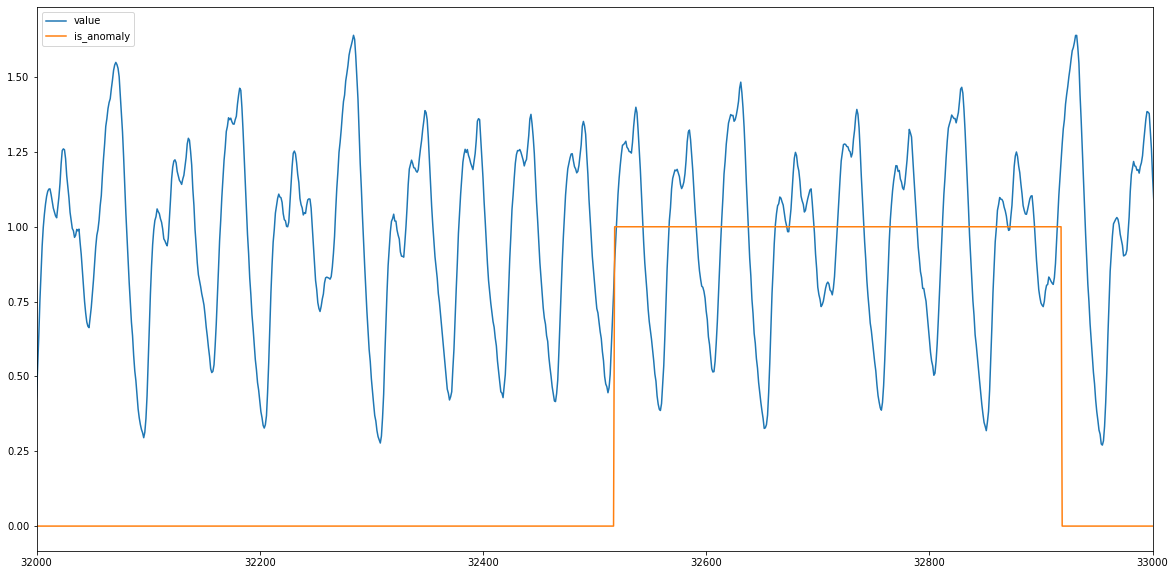

In [38]:
df[["value", "is_anomaly"]].plot()
plt.xlim(32000, 33000)
plt.show()

In [39]:
anomaly_window_margins = 10
s_change = df["is_anomaly"] - df["is_anomaly"].shift()
anomaly_points = df[s_change == 1].index + 200
df["is_anomaly_point"] = 0
for x in anomaly_points:
    df.loc[list(range(x-anomaly_window_margins, x+anomaly_window_margins)), "is_anomaly_point"] = 1
df

,timestamp,value,is_anomaly,is_anomaly_point
0,1970-01-01 00:00:00,0.902918,0,0
1,1970-01-01 00:00:01,0.971865,0,0
2,1970-01-01 00:00:02,1.047105,0,0
3,1970-01-01 00:00:03,1.108403,0,0
4,1970-01-01 00:00:04,1.150962,0,0
...,...,...,...,...
99995,1970-01-02 03:46:35,1.186836,0,0
99996,1970-01-02 03:46:36,1.191163,0,0
99997,1970-01-02 03:46:37,1.188584,0,0
99998,1970-01-02 03:46:38,1.195656,0,0


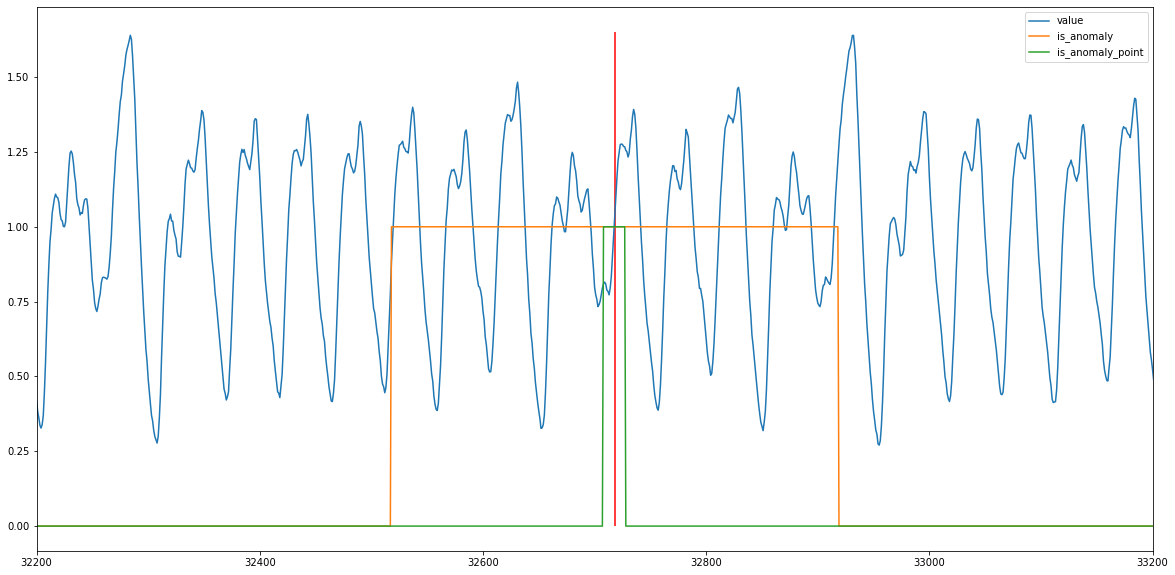

In [40]:
df[["value", "is_anomaly", "is_anomaly_point"]].plot()
plt.vlines([x for x in anomaly_points], ymin=0, ymax=np.max(df["value"]), color="red")
plt.xlim(32200, 33200)
plt.show()